In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import csv
import math
import nltk

In [2]:
def read_csv(path, sep= ',', names=["PAGENAME", "???", "GT"]):
    with open(path) as file:
        rows = file.read().split("\n")
        data = np.array([row.split(sep) for row in rows if len(row.split(sep)) == 3])
    return pd.DataFrame(data=data, columns=names)

In [3]:
ocr_file_0 = "../ocr_data/nlf_ocr_gt_tescomb5_2017.xlsx"
ocr_file_1 = "../ocr_data/test1-id-ocr-gt.tsv"
ocr_file_2 = "../ocr_data/test2-id-ocr-gt.tsv"
ocr_file_3 = "../ocr_data/test3-id-ocr-gt.tsv"
ocr_file_4 = "../ocr_data/test4-id-ocr-gt.tsv"
ocr_file_5 = "../ocr_data/test5-id-ocr-gt.tsv"

In [5]:
finnish_data = "tekstiä tähän"#???
swedish_data = "svenska här"#???
df_1 = read_csv(ocr_file_1, sep = "\t", names=["PAGENAME", "???", "GT"])
df_2 = read_csv(ocr_file_2, sep = "\t", names=["PAGENAME", "???", "GT"])
df_3 = read_csv(ocr_file_3, sep = "\t", names=["PAGENAME", "???", "GT"])
df_4 = read_csv(ocr_file_4, sep = "\t", names=["PAGENAME", "???", "GT"])
df_5 = read_csv(ocr_file_5, sep = "\t", names=["PAGENAME", "???", "GT"])
df_5.shape

(1512, 3)

In [4]:
dfs = pd.read_excel(ocr_file_0, sheet_name="Words", header=3, skip_rows=[0,1,2])
dfs.shape

(500640, 15)

In [58]:
# pd.read_csv fails to parse some rows
#df_1 = pd.read_csv(ocr_file_1, sep= '\t', names=["PAGENAME", "???", "GT"], header = None, encoding="utf8")
#df_2 = pd.read_csv(ocr_file_2, sep= '\t', names=["PAGENAME", "???", "GT"], header = None, encoding="utf8")
#df_3 = pd.read_csv(ocr_file_3, sep= '\t', names=["PAGENAME", "???", "GT"], header = None, encoding="utf8", quoting=csv.QUOTE_NONE)
#df_4 = pd.read_csv(ocr_file_4, sep= '\t', names=["PAGENAME", "???", "GT"], header = None, encoding="utf8")
#df_5 = pd.read_csv(ocr_file_5, sep= '\t', names=["PAGENAME", "???", "GT"], header = None, encoding="utf8")
#df_5.shape

(1373, 3)

In [64]:
dfs.head()

,PUBTYPE,PUBYEAR,ISSN,PAGENAME,SORTORDER,GT,TESSERACT,OLD,FR11,TESCOMB_EQ,OLD_EQ,FR11_EQ,TESCOMB_MATCH,OLD_MATCH,FR11_MATCH
0,AIK,1884,fk00010,fk00010_1884-12-09_0_8,1,N:o,NaN,M:c>,Hl:c>,0,0,0,0,1,1
1,AIK,1884,fk00010,fk00010_1884-12-09_0_8,2,0.,NaN,0.,O.,0,1,0,0,1,1
2,AIK,1884,fk00010,fk00010_1884-12-09_0_8,3,taan,taan,taan,taan,1,1,1,1,1,1
3,AIK,1884,fk00010,fk00010_1884-12-09_0_8,4,sekä,sekä,sekä,sekä,1,1,1,1,1,1
4,AIK,1884,fk00010,fk00010_1884-12-09_0_8,5,ehdottomasti,ehdottomasti,ehdottomasti,ehdottomasti,1,1,1,1,1,1


In [258]:
dfs.values[2]

array(['AIK', 1884, 'fk00010', 'fk00010_1884-12-09_0_8', 3, 'taan',
       'taan', 'taan', 'taan', 1, 1, 1, 1, 1, 1], dtype=object)

In [6]:
ground_truth = dfs.values[:,5].astype(np.str)
ocr_tess = dfs.values[:,6].astype(np.str)
ocr_old = dfs.values[:,7].astype(np.str)
ocr_fr11 = dfs.values[:,8].astype(np.str)
ocr_unk = np.concatenate([df_1.values[:,1],df_2.values[:,1],df_3.values[:,1],df_4.values[:,1],df_5.values[:,1]])
gt_unk = np.concatenate([df_1.values[:,2],df_2.values[:,2],df_3.values[:,2],df_4.values[:,2],df_5.values[:,2]])

In [7]:
def join(array):
    return " ".join(map(str, array))
def combine_to_pages(dataframe, column):
    pages = np.split(dataframe.values[:, column], np.cumsum(np.unique(dataframe.values[:, 3], return_counts=True)[1])[:-1])
    return np.array(list(map(join, pages)))
pages_gt = combine_to_pages(dfs, 5)
pages_tess = combine_to_pages(dfs, 6)
pages_old = combine_to_pages(dfs, 7)
pages_fr11 = combine_to_pages(dfs, 8)
pages_gt[1]

'että kunnille sallittaisiin walta sulkea kapakat alueellaan, mutta wielä ei ole semmoinen laki tullut toimeen. Parlamentti on tosin kerran hywäksynyt tätä asiaa periaatteena, mutta periaatteesta käytäntöön näyttää olewan koko pitkä tie. Nykyhetkenä wallitsee waltakunnassa kiihkeä taistelu muutettawasta waalilaista, joka tempaa puoleensa kaikkien huomion ja työntää syrjään raittiusasian, ja sen ohessa on ollut ja on muitakin asioita, joilla on koetettu ja onnistuttu sekoittaa pois waltiopäiwämiesten mielet kun raittiusasia on nostettu puheeksi; mutta sillä wälin waan juurtuwat raittiuden periaatteet sywemmin kansassa, niin että kun kerran asia todellakin otetaan puheeksi, kaiketi woidaan toiwoa paljon hywää raittiusasialle. Ja woitto Englannissa ei olisi woitto Englannille yksistään, se esimerkki waikuttaisi laajalle ympäri maailman. — Wenäjän aloja kuwaawa on tapaus, jonka "Inkeri" kertoo, Kauppias Makarowilla oli eräässä seurakunnassa ollut kaksi kapakkaa. Saadakseen seurakuntalaiste

In [8]:
print(len(df_1))
df_2.head()

1546


,PAGENAME,???,GT
0,0013-6522_1934-01_1__P20_TL00087,nyt hän on jo mennyt nukkumaan. Täytyy nukkua,nyt hän on jo mennyt nukkumaan. Täytyy nukkua
1,0018-2362_1916_2__P94_TL00019,omistuksen saadessa arvoa ruvettiin osuutta yh...,omistuksen saadessa arvoa ruvettiin osuutta yh...
2,0022-9415_1906-05_3__P14_TL00035,"että myöskin lääkärille, joka voi luottaa meid...","että myöskin lääkärille, joka voi luottaa meid..."
3,0023-4281_1937-01-15_2__P16_TL00029,pysyttää kaksosiaan mahdollisimman samanlaisin...,pysyttää kaksosiaan mahdollisimman samanlaisin...
4,0024-0699_1929-01_1__P9_TL00031,"riittäväksi, vaan oli kuten mainittiin. keväällä","riittäväksi, vaan oli kuten mainittiin, keväällä"


In [9]:
page_name, p_i = np.unique(dfs.values[:, 3], return_counts=True)
page_name = page_name[np.argsort(p_i)]

In [12]:
# cross referencing 3 ocr results and marking it correct if two of them have the same result
# correctly marks ~90% of of the results, requires at least 3 different ocr results to be used
# in other words the quality estimates can vary at least +-10% from the true values
# if the quality of the ocr results varies a lot between implementations, the best and worst are hard to distinguish

cross_cmp = (ocr_tess == ocr_old) & (ocr_tess == ocr_fr11)
cross_cmp_tess = (ocr_tess == ocr_old) | (ocr_tess == ocr_fr11)
cross_cmp_old = (ocr_old == ocr_tess) | (ocr_old == ocr_fr11)
cross_cmp_fr11 = (ocr_fr11 == ocr_tess) | (ocr_fr11 == ocr_old)

cross_cmp_int = cross_cmp*1
cross_cmp_tess_int = cross_cmp_tess*1
cross_cmp_old_int = cross_cmp_old*1
cross_cmp_fr11_int = cross_cmp_fr11*1
#print("combined",np.mean(cross_cmp_int == dfs.values[:,9]))
#print("combined",np.mean(cross_cmp_int == dfs.values[:,10]))
#print("combined",np.mean(cross_cmp_int == dfs.values[:,11]))
print("accuracy of estimation tess", np.mean(cross_cmp_tess_int == dfs.values[:,9]))
print("accuracy of estimation old ", np.mean(cross_cmp_old_int == dfs.values[:,10]))
print("accuracy of estimation fr11", np.mean(cross_cmp_fr11_int == dfs.values[:,11]))
print("predicted_quality combined", np.mean(cross_cmp_int)) #all match
print("predicted_quality tess", np.mean(cross_cmp_tess_int)) #at least one match
print("predicted_quality old ", np.mean(cross_cmp_old_int))
print("predicted_quality fr11", np.mean(cross_cmp_fr11_int))
print("true_quality tess", np.mean(dfs.values[:,9]))
print("true_quality old ", np.mean(dfs.values[:,10]))
print("true_quality fr11", np.mean(dfs.values[:,11]))

accuracy of estimation tess 0.8631671460530521
accuracy of estimation old  0.9114333652924257
accuracy of estimation fr11 0.8956156120166188
predicted_quality combined 0.6034096356663471
predicted_quality tess 0.7501138542665389
predicted_quality old  0.7691714605305209
predicted_quality fr11 0.8104705976350272
true_quality tess 0.8135246883988495
true_quality old  0.7041506871204858
true_quality fr11 0.7693092841163311


In [74]:
np.mean((ocr_unk==gt_unk)*1)

0.596439566323116

In [112]:
def word_align(ocr, truth):
    #compute lehvenstein stuff but return an array of
    # 1,x,x,x if correct letter
    # x,1,x,x if different letter
    # x,x,1,x if missing letter
    # x,x,x,1 if extra letter
    words = len(truth.split())
    m = len(ocr)
    n = len(truth)
    d = np.zeros([n+1, m+1], np.int)
    path = np.zeros([n+1, m+1], np.int)
    path[0,0] = 2
    for i in range(1, n+1):
        d[i, 0] = i
        path[i, 0] = 1
    for j in range(1, m+1):
        d[0, j] = j
        path[0, j] = 0
    for j in range(1, m+1):
        for i in range(1, n+1):
            substitutionCost = 1-(truth[i-1] == ocr[j-1])*1
            choices = [ d[i-1, j] + 1,                   # deletion
                        d[i, j-1] + 1,                   # insertion
                        d[i-1, j-1] + substitutionCost]  # substitution
            min_choice = np.argmin(choices)
            
            path[i, j] = min_choice
            d[i, j] = choices[min_choice]
    i = n
    w = words-1
    res = np.zeros([words+1], np.int)
    res[words] = len(ocr)
    for j in range(m, -1, -1):
        prev = -1
        while prev <= 0:
            prev = path[i, j]
            if prev == 0: #deletion
                if i<1 or truth[i-1] == ' ':
                    res[w] = j
                    w -= 1
                    w = max(w, 0)
                i -= 1
            elif prev == 1: #insertion
                pass
            elif prev == 2: #substitution
                if i<1 or truth[i-1] == ' ':
                    res[w] = j
                    w -= 1
                    w = max(w, 0)
                i -= 1
    return res
def vector_word_align(ocr, gt): #np.vectorize(lehvenstein_differences, signature='()->(n)')
    assert(len(ocr)==len(gt))
    return np.array([word_align(ocr[i], gt[i]) for i in range(len(ocr))])
    

In [113]:
unk_splits = vector_word_align(ocr_unk, gt_unk)

In [116]:
parts = [[ocr_unk[ind][unk_splits[ind][i]:unk_splits[ind][i+1]].strip() for i in range(len(unk_splits[ind])-1)] for ind in range(len(unk_splits))]
print(parts[50])
print(gt_unk[50])

['seen,', 'miel.', 'saaan', 'paikkaan.', 'Vas-']
seen, miel. samaan paikkaan. Vas-


In [126]:
# the uniformly selected data aligned to word level
ocr_unk_words = np.concatenate(parts)
gt_unk_words = np.concatenate([sentence.split() for sentence in gt_unk])
print(len(gt_unk_words), len(ocr_unk_words))

46902 46902


In [125]:
# word level accuracy
print(np.sum(gt_unk_words == ocr_unk_words) / len(gt_unk_words))

0.8890878853780223


In [13]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1] #/ (1.0*len(s2))  
vectorLehvenstein = np.vectorize(levenshteinDistance)

In [14]:
lehv_distances = vectorLehvenstein(df_1.values[:, 1], df_1.values[:, 2])
worst_df_1_ind = np.argsort(lehv_distances)
print(levenshteinDistance(df_1.values[worst_df_1_ind[-1],1],df_1.values[worst_df_1_ind[-1],2]))
df_1.values[worst_df_1_ind[-25:],:]

69


array([['1457-4314_1866-10-19_244__P4_TL00036', 'k4.0 N ller-',
        '+ .4.0| N | 1 | klart'],
       ['1457-4772_1795-12-30_52__P1_TL00034', 'V', 'Åbo Tidningar'],
       ['1458-0802_1873-11-07_304__P3_TL00076',
        'ai ivan. mnat eeuuden. su anse',
        'vit frih. Bildt erbjuden. Nu anse'],
       ['1457-4330_1843-07-07_6__P2_TL00132',
        'toge Wärdshuse wo yuge rig', 'sage Wärdshuset'],
       ['0785-398X_1865-09-21_110__P3_TL00107',
        'öäste som det sdelt hane bil, Deone laliets ut-',
        'furste som det sjelf hade valt. Denne folkets ut-'],
       ['1457-439X_1848-07-05_51__P2_TL00067',
        'en bel weckas frånwaro från bemmest, irremnaor s eer',
        'en hel weckas frånwaro från hemmet, irrande uti en med'],
       ['1457-4314_1871-05-31_123__P4_TL00134',
        'oora ögeniör uiuner, gapten Theolef och pandl Aim',
        'borg. Ingeniör Ullner, Kapten Thesleff och handl. Lind'],
       ['1457-4802_1856-04-14_29__P3_TL00001',
        'äf airn fpger

1546

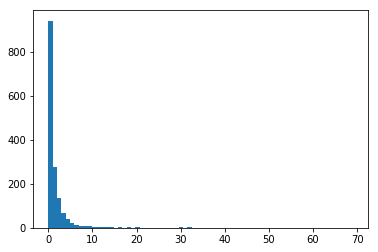

In [15]:
plt.hist(lehv_distances, bins=70)
len(lehv_distances)

In [61]:
lehv_tess = vectorLehvenstein(ocr_tess, ground_truth)
lehv_old = vectorLehvenstein(ocr_old, ground_truth)
lehv_fr11 = vectorLehvenstein(ocr_fr11, ground_truth)
print(np.mean(lehv_tess))

0.7084911313518696


0.7084911313518696
0.7952380952380952
0.4926853627356983


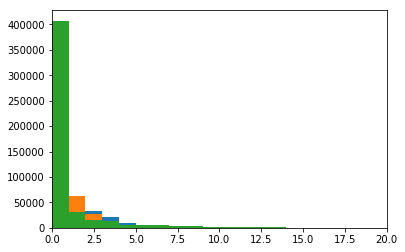

In [73]:

plt.hist(lehv_old, bins=max(lehv_old))
plt.hist(lehv_fr11, bins=max(lehv_fr11))
plt.hist(lehv_tess, bins=max(lehv_tess))
plt.xlim(0,20)
print(np.mean(lehv_tess))
print(np.mean(lehv_old))
print(np.mean(lehv_fr11))

In [16]:
def entropy(string):
        "Calculates the Shannon entropy of a string"
        string = str(string)

        # get probability of chars in string
        prob = [ float(string.count(c)) / len(string) for c in dict.fromkeys(list(string)) ]

        # calculate the entropy
        entropy = - sum([ p * math.log(p) / math.log(2.0) for p in prob ])

        return entropy
    
def per_char_entropy(string):
    length = max(len(str(string)),1)
    return entropy(string) / length


def entropy_ideal(length):
        "Calculates the ideal Shannon entropy of a string with given length"

        prob = 1.0 / length

        return -1.0 * length * prob * math.log(prob) / math.log(2.0)
vectorEntropy = np.vectorize(entropy)
vectorPerCharEntropy = np.vectorize(per_char_entropy)

In [17]:
print(np.mean(vectorPerCharEntropy(ocr_tess)))
print(np.mean(vectorPerCharEntropy(ocr_old)))
print(np.mean(vectorPerCharEntropy(ocr_fr11)))
print(np.mean(vectorPerCharEntropy(ground_truth)))

0.3489197209859479
0.3497368233322507
0.3485379729081539
0.3486307159599252


In [18]:
counts_tess = collections.Counter("".join(pages_tess))
counts_old = collections.Counter("".join(pages_old))
counts_fr11 = collections.Counter("".join(pages_fr11))
counts_gt = collections.Counter("".join(pages_gt))
len_tess = len("".join(pages_tess))
len_old = len("".join(pages_old))
len_fr11 = len("".join(pages_fr11))
len_gt = len("".join(pages_gt))
list(sorted(counts_old.items(), key = lambda x: x[1], reverse=True))[-5:]

[('ü', 5), ('Å', 5), ('#', 4), ('™', 1), ('Ü', 1)]

In [19]:
def KL_divergence(string_ratio_corpus_ratio):
    string_ratio, corpus_ratio = string_ratio_corpus_ratio
    return string_ratio*np.log2(string_ratio / corpus_ratio)
    
def mean_KL_divergence(string, counts_data, len_data):
    string = str(string)
    string_ratio = map(lambda char: string.count(char) / len(string), string)
    corpus_ratio = map(lambda char: counts_data[char] / len_data, string)
    KL_div = list(map(KL_divergence, zip(string_ratio, corpus_ratio)))
    return np.mean(KL_div)
    
    
mean_KL_divergence("üö", counts_old, len_old)

6.419403082960818

In [20]:
def map_tess_KL(string):
    return mean_KL_divergence(string, counts_tess, len_tess)
def map_old_KL(string):
    return mean_KL_divergence(string, counts_old, len_old)
def map_fr11_KL(string):
    return mean_KL_divergence(string, counts_fr11, len_fr11)
def map_gt_KL(string):
    return mean_KL_divergence(string, counts_gt, len_gt)
kl_tess = np.array(list(map(map_tess_KL, ocr_tess)))
kl_old = np.array(list(map(map_old_KL, ocr_old)))
kl_fr11 = np.array(list(map(map_fr11_KL, ocr_fr11)))
kl_gt = np.array(list(map(map_gt_KL, ground_truth)))

In [23]:
kl_treshold = 1.5
kl_treshold_tess_int = (kl_tess<kl_treshold)*1
kl_treshold_old_int = (kl_old<kl_treshold)*1
kl_treshold_fr11_int = (kl_fr11<kl_treshold)*1
kl_treshold_gt_int = (kl_gt<kl_treshold)*1

print(np.mean(kl_treshold_tess_int*1 == dfs.values[:,9]))
print(np.mean(kl_treshold_old_int*1 == dfs.values[:,10]))
print(np.mean(kl_treshold_fr11_int*1 == dfs.values[:,11]))
print("expected_quality", np.mean(kl_treshold_tess_int))
print("expected_quality", np.mean(kl_treshold_old_int))
print("expected_quality", np.mean(kl_treshold_fr11_int))
print("expected_quality gt", np.mean(kl_treshold_gt_int))
print("true_quality", np.mean(dfs.values[:,9]))
print("true_quality", np.mean(dfs.values[:,10]))
print("true_quality", np.mean(dfs.values[:,11]))

0.7666347075743049
0.6438718440396293
0.6732702141259188
expected_quality 0.8150667146053052
expected_quality 0.8237615851709812
expected_quality 0.8354606104186642
expected_quality gt 0.8474332853946948
true_quality 0.8135246883988495
true_quality 0.7041506871204858
true_quality 0.7693092841163311


In [24]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(kl_treshold_tess_int == 1, dfs.values[:,9] == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(kl_treshold_tess_int == 0, dfs.values[:,9] == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(kl_treshold_tess_int == 1, dfs.values[:,9] == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(kl_treshold_tess_int == 0, dfs.values[:,9] == 1))

print(TP,FP,TN,FN)

349253 58802 34555 58030


In [236]:
#Create bigrams
bgs_old = nltk.bigrams(" ".join(pages_old))
bgs_tess = nltk.bigrams(" ".join(pages_tess))
bgs_fr11 = nltk.bigrams(" ".join(pages_fr11))
bgs_gt = nltk.bigrams(" ".join(pages_gt))

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs_gt)

def freq_cmp(a):
    return a[1]
def printable_bigram_freqs(freq):
    k, v = freq
    return "".join(k)+" "+str(v)
", ".join(map(printable_bigram_freqs, sorted(list(fdist.items()), key=freq_cmp, reverse=True)))

'n  124402, a  93627, ta 66964, en 63141, in 62363, an 55692, is 52213,  k 49491, .  46782, st 46689, ä  45465, si 43948, ,  42123, ll 41736, tt 41731, aa 41633, i  39189,  s 38639, ka 38062, tä 37537, se 36892,  t 36714, sa 35163,  j 35156, it 34280, wa 32156, ai 31331,  o 30971, et 29847, ja 29582,  w 29084, la 29057,  m 28603,  p 28437, li 28064, al 27518, te 27512, el 27353, t  26537, tu 25696, on 25586, oi 25418, ma 25260, le 24762, än 24655, ti 23403, as 22998, ss 22466, at 22452, ku 22441, ki 22385,  e 21750, ne 21734, il 21370, ks 21264, mi 21183, ii 20765, ol 20752, ko 20735, ut 20478, e  20179,  h 19897, un 19235, ik 19074, es 18493, ää 17918, uu 17556, to 17467, ei 17467, uo 17278, jo 16781, ar 16738, ee 16317,  l 16217, na 15932,  a 15777, me 15674, us 15468, ke 15391,  n 15288, ni 15127, ri 14881, er 14780, nn 14672, lä 14384, ul 14245, ra 14023, nt 13996, ie 13968, ak 13402, wi 12998, pa 12947, uk 12581, os 12459, ns 12425, a, 12278, sä 12113, de 11987, ot 11966, lu 11741

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [26]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.LSTM(hidden_size, hidden_size, n_layers)#nn.GRU(hidden_size, hidden_size, n_layers)#
        self.decoder = nn.Linear(hidden_size, output_size)
        self.sig = nn.Sigmoid()
    
    def forward(self, input, hidden):
        #print(input)
        input = self.encoder(input.view(1, -1))
        #print(input)
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        #print(output)
        output = self.decoder(output.view(1, -1))
        #print(output)
        output = self.sig(output)
        return output, hidden

    def init_hidden(self):
        return (Variable(torch.zeros(self.n_layers, 1, self.hidden_size)),
                Variable(torch.zeros(self.n_layers, 1, self.hidden_size)))#
        #return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [27]:
all_characters = sorted(list(set(" ".join(np.concatenate([ground_truth,ocr_tess,ocr_old,ocr_fr11,ocr_unk,gt_unk])))))
n_characters = len(all_characters)

def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(all_characters, len(all_characters))
print(char_tensor('all_characters'))

[' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\x84', '¡', '£', '¦', '§', '©', '«', '®', '°', '²', '³', '´', '¹', 'º', '»', '¼', '½', '¾', 'À', 'Ä', 'Å', 'É', 'Ö', '×', 'Ü', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ë', 'ì', 'ï', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ú', 'ü', 'Ā', 'ă', 'ė', 'Ő', 'ő', 'œ', 'š', 'ȧ', 'ʃ', '˝', 'ˮ', '˶', '˷', '̋', 'β', 'ε', 'λ', 'А', 'В', 'Г', 'Е', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Ц', 'Ч', 'Ъ', 'Ы', 'Ь', 'Ю', 'Я', 'а', 'б', 'в', 'г', 'д', 'е', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 

In [60]:
def estimate_accuracy(estimator, ocr):
    res = []
    for item in ocr:
        hidden = estimator.init_hidden()
        item_output = []
        for char in char_tensor(item):
            output, hidden = estimator(char, hidden)
            item_output.append(output.detach().numpy()[0])
        res.append(np.array(item_output))
    return np.array(res)
def estimate_quality(estimator, ocr):
    item_acc = 0
    char_acc = 0
    word_acc = 0
    char_len = 0
    word_len = 0
    for item in ocr:
        char_len += len(item)
        word_len += 1
        hidden = estimator.init_hidden()
        tmp_item_acc = 0
        tmp_item_err = 0
        tmp_word_err = 0
        for char in char_tensor(item):
            if(char == char_tensor(" ")[0]):
                word_acc += 1 - np.min([tmp_word_err, 1])
                tmp_word_err = 0
                word_len += 1
            output, hidden = estimator(char, hidden)
            tmp = (output.detach().numpy()[0] >= 0.5) * 1 #(np.argmax(output.detach().numpy().squeeze(0))==0)*1
            tmp_item_acc += tmp
            tmp_item_err += 1 - tmp
            tmp_word_err += 1 - tmp
        char_acc += tmp_item_acc
        item_acc += 1 - np.min([tmp_item_err, 1])
        word_acc += 1 - np.min([tmp_word_err, 1])
            
    item_acc = item_acc/len(ocr)
    word_acc = word_acc/max(word_len, 1)
    char_acc = char_acc/max(char_len, 1)
    return (item_acc, word_acc, char_acc)
            

In [29]:
def lehvenstein_differences(ocr, truth):
    #compute lehvenstein stuff but return an array of
    # 1,x,x,x if correct letter
    # x,1,x,x if different letter
    # x,x,1,x if missing letter
    # x,x,x,1 if extra letter
    m = len(ocr)
    n = len(truth)
    d = np.zeros([n+1, m+1], np.int)
    path = np.zeros([n+1, m+1], np.int)
    path[0,0] = 2
    for i in range(1, n+1):
        d[i, 0] = i
        path[i, 0] = 1
    for j in range(1, m+1):
        d[0, j] = j
        path[0, j] = 0
    for j in range(1, m+1):
        for i in range(1, n+1):
            substitutionCost = 1-(truth[i-1] == ocr[j-1])*1
            choices = [ d[i-1, j] + 1,                   # deletion
                        d[i, j-1] + 1,                   # insertion
                        d[i-1, j-1] + substitutionCost]  # substitution
            min_choice = np.argmin(choices)
            
            path[i, j] = min_choice
            d[i, j] = choices[min_choice]
    i = n
    res = np.zeros([m+1, 4], np.int)
    for j in range(m, -1, -1):
        prev = -1
        while prev <= 0:
            prev = path[i, j]
            #print(truth[i-1] , ocr[j-1], i, j, prev)
            if prev == 0: #deletion
                i -= 1
                res[j, 3] = 1
            elif prev == 1: #insertion
                res[j, 2] = 1
            elif prev == 2: #substitution
                if (i<=0 or truth[i-1] == ocr[j-1]):
                    if res[j, 3]==0:
                        res[j, 0] = 1 # correct
                else:
                    res[j, 1] = 1 # wrong character
                i -= 1
    return res[:,0]
def vector_differences(ocr, gt): #np.vectorize(lehvenstein_differences, signature='()->(n)')
    assert(len(ocr)==len(gt))
    return np.array([lehvenstein_differences(ocr[i], gt[i]) for i in range(len(ocr))])

In [30]:
target_old = vector_differences(ocr_old, ground_truth)
target_old[0], ocr_old[0], ground_truth[0]

(array([1, 0, 1, 0, 0]), 'M:c>', 'N:o')

In [38]:
training_data = " "+" ".join(ocr_old)
target_data = torch.Tensor(np.concatenate(target_old).astype(np.long))
chunk_len = 400
data_len = len(training_data)

def random_chunk():
    start_index = np.random.randint(0, data_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return (training_data[start_index:end_index], target_data[start_index:end_index])

print(data_len)
print(target_data.shape)
print(training_data[:10])
print(target_data[:10])
#print(random_chunk())

3905852
torch.Size([3905852])
 M:c> 0. t
tensor([1., 0., 1., 0., 0., 1., 1., 1., 1., 1.])


In [39]:
def random_training_set():    
    chunk, target = random_chunk()
    inp = char_tensor(chunk)
    #target = target_data[chunk]
    return inp, Variable(target)

In [40]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [41]:
def train(inp, target, model, optimizer):
    chunk_len = len(inp)
    hidden = model.init_hidden()
    model.zero_grad()
    loss = Variable(torch.Tensor(1))
    
    for c in range(chunk_len):
        output, hidden = model(inp[c], hidden)
        tmploss = criterion(output, target[c].unsqueeze(0)) #criterion expects a batch dimension, so unsqueeze one
        if(tmploss < 0 or tmploss > 10):
            print(output, target[c].unsqueeze(0), tmploss)
        loss += tmploss

    loss.backward()
    optimizer.step()

    return loss.item() / chunk_len

In [42]:
n_epochs = 400
print_every = 100
plot_every = 10
hidden_size = 100
target_size = 1
n_layers = 2
lr = 0.005

ocr_estimator = RNN(n_characters, hidden_size, target_size, n_layers)
ocr_optimizer = torch.optim.Adam(ocr_estimator.parameters(), lr=lr)
criterion = nn.BCELoss()#nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs + 1):
    with torch.enable_grad():
        loss = train(*random_training_set(), ocr_estimator, ocr_optimizer)       
        loss_avg += loss

        if epoch % print_every == 0:
            print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))

        if epoch % plot_every == 0:
            all_losses.append(loss_avg / plot_every)
            loss_avg = 0

/Users/Herpior/anaconda2/envs/python3_7/lib/python3.7/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


 59s (100 25%) 0.1800]
 58s (200 50%) 0.1396]
 54s (300 75%) 0.1053]
 47s (400 100%) 0.1586]


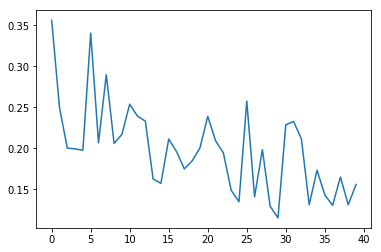

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [44]:
est = estimate_accuracy(ocr_estimator, ocr_unk)
print(ocr_unk[:2])
est[:2]

['yksityisten henkilöiden viljeltäviksi ja asuttaviksi.» Lausunnossa'
 'Mieheni ei tarvitse apua. Odota,']


array([array([[0.91300106],
       [0.9911963 ],
       [0.99340254],
       [0.9856483 ],
       [0.9650695 ],
       [0.9914057 ],
       [0.9721386 ],
       [0.9929052 ],
       [0.96534246],
       [0.993666  ],
       [0.9874622 ],
       [0.9956091 ],
       [0.9898357 ],
       [0.9942409 ],
       [0.986233  ],
       [0.9938367 ],
       [0.9796509 ],
       [0.9040132 ],
       [0.94766915],
       [0.96893543],
       [0.98247266],
       [0.9921152 ],
       [0.9867027 ],
       [0.9955818 ],
       [0.4174676 ],
       [0.9676675 ],
       [0.79022795],
       [0.9577398 ],
       [0.9910568 ],
       [0.9241124 ],
       [0.9509317 ],
       [0.9843709 ],
       [0.09284471],
       [0.9353548 ],
       [0.9921308 ],
       [0.99311453],
       [0.97799784],
       [0.99578214],
       [0.99054563],
       [0.99043417],
       [0.9958954 ],
       [0.9866763 ],
       [0.99476963],
       [0.96037966],
       [0.9701315 ],
       [0.9673507 ],
       [0.989032  ],
      

In [509]:
estimate_quality(ocr_estimator, ocr_unk)

(array([0.24293937]), array([0.36846136]), array([0.94147841]))

In [518]:
estimate_quality(ocr_estimator, ocr_unk)

(array([0.2027841]), array([0.37180567]), array([0.93897348]))

In [58]:
estimate_quality(ocr_estimator, ocr_unk)

(array([0.21148441]), array([0.72591969]), array([0.94722345]))

In [59]:
estimate_quality(ocr_estimator, pages_old)

(array([0.]), array([0.85664816]), array([0.96925159]))

In [50]:
estimate_quality(ocr_estimator, ocr_old[15000:20000])

(array([0.8902]), 0.0, array([0.97974282]))

In [51]:
estimate_quality(ocr_estimator, ocr_old[20000:30000])

(array([0.863]), 0.0, array([0.97092597]))

In [52]:
estimate_quality(ocr_estimator, ocr_old[30000:40000])

(array([0.8862]), 0.0, array([0.97806396]))

In [53]:
estimate_quality(ocr_estimator, ocr_old)

(array([0.86480105]), 0.0, array([0.97245928]))

In [54]:
estimate_quality(ocr_estimator, ocr_tess)

(array([0.93927972]), array([0.8]), array([0.98979578]))

In [55]:
estimate_quality(ocr_estimator, ocr_fr11)

(array([0.89256352]), 0.0, array([0.98021013]))

In [56]:
estimate_quality(ocr_estimator, ground_truth)

(array([0.94692793]), 0.0, array([0.99135343]))

In [ ]:
estimate_quality(ocr_estimator, [""])